# Downtime Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
device_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\DeviceProperty.csv")
device_df

,deviceKey,Area,DefaultCycleTime,Enterprise,Line,Location,Operation,Plant,SubType,Type
0,Line1,Assembly-2,50,ManuCorp,AssemblyMain,Building G,Advanced Assembly,NorthPlant,HighSpeed,Production-Premium
1,Line2,Fab-Pro,75,ManuCorp,WeldingPrimary,Building C-2,Laser Welding,SouthPlant,Precision,Production-Laser
2,Line3,Paint-Auto,100,ManuCorp,PaintingMain,Building D-2,Electrostatic Paint,WestPlant,E-Coat,Production-Finish
3,Line4,Smart-Logistics,20,ManuCorp,MaterialFlow,Building J,AGV Transfer,WestPlant,Automated,Smart-Logistics


In [4]:
prod_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\ProductionMetric.csv")
prod_df

,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name
0,5552062,Line3,2025-01-29 19:10:14.3284760 -06:00,2025-01-29 19:13:19.6285480 -06:00,0,0,0.000000,0.000000,185.300072,0.0,185.300072,Unplanned Stop,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.000000,0.0,0.000000,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2
2,5552046,Line4,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:02:07.0000000 -06:00,54,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3
3,5552048,Line2,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:34.0000000 -06:00,0,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3
4,5552049,Line1,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:52.0000000 -06:00,67,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5420551,Line3,2025-01-17 11:26:05.5650680 -06:00,2025-01-17 11:29:11.4843000 -06:00,0,0,0.000000,0.000000,185.919232,0.0,185.919232,Unplanned Stop,Down,No Bottles,Part F-3000,Part F,First Shift,Team 1
9996,5420547,Line3,2025-01-17 11:19:12.1559110 -06:00,2025-01-17 11:26:05.5650680 -06:00,210,16,372.159850,413.409157,0.000000,0.0,0.000000,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1
9997,5420543,Line3,2025-01-17 11:16:22.5533940 -06:00,2025-01-17 11:19:12.1559110 -06:00,0,0,0.000000,0.000000,169.602517,0.0,169.602517,Unplanned Stop,Down,Random Inspection,Part F-3000,Part F,First Shift,Team 1
9998,5420541,Line3,2025-01-17 11:15:00.0000000 -06:00,2025-01-17 11:16:22.5533940 -06:00,13,10,37.762533,82.553394,0.000000,0.0,0.000000,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1


In [5]:
quality_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\Quality.csv")
quality_df

,quality_stream_key,deviceKey,count,reject_reason_display_name,prodmetric_stream_key
0,1771948,Line 4,6,Detected by Max WIP,5468380
1,1772152,Line 4,11,Reject,5468383
2,1772153,Line 4,9,Detected by Max WIP,5468383
3,1772154,Line 4,11,Detected by Max WIP,5468386
4,1772155,Line 4,9,Reject,5468386
...,...,...,...,...,...
7165,1827594,Line 3,7,Detected by Max WIP,5551952
7166,1827612,Line 1,10,Underweight,5552001
7167,1827613,Line 1,14,Cosmetic Defect,5552001
7168,1827634,Line 4,13,Reject,5552039


In [6]:
# Calculating total unplanned_stop_time and planned_stop_time
# Sum of the two times
total_unplanned_stop_time = prod_df['unplanned_stop_time'].sum()
total_planned_stop_time = prod_df['planned_stop_time'].sum()

# Adding them together to get total
total_downtime = total_unplanned_stop_time + total_planned_stop_time 
print(total_downtime)

622443.474034


In [7]:
# Calculating the proportions
prop_unplanned = total_unplanned_stop_time/total_downtime
prop_planned = total_planned_stop_time/total_downtime
print(prop_unplanned)
print(prop_planned)

0.7598575136578023
0.24014248634219781


In [8]:
print(f"Total Unplanned Downtime: {total_unplanned_stop_time}")
print(f"Total Planned Downtime: {total_planned_stop_time}")
print(f"Proportion of Unplanned Downtime: {prop_unplanned:.2%}")
print(f"Proportion of Planned Downtime: {prop_planned:.2%}")

Total Unplanned Downtime: 472968.350572
Total Planned Downtime: 149475.123462
Proportion of Unplanned Downtime: 75.99%
Proportion of Planned Downtime: 24.01%


In [14]:
# Summarizing Downtime 
# getting total downtime first
prod_df['total_downtime'] = prod_df['unplanned_stop_time']+prod_df['planned_stop_time']

# making sure to not include values like 0 since at 0 it means the machines are working
# also made new dataframe to not change the original
downtime_df = prod_df[prod_df['total_downtime']>0]

In [15]:
# aggregating the total downtime to get the summary of the stats
downtime_stats = downtime_df.groupby('deviceKey')['total_downtime'].agg(
    mean = 'mean',
    median='median',
    std='std',
    min='min',
    max='max'
)

In [16]:
# adding range column
downtime_stats['range'] = downtime_stats['max'] - downtime_stats['min']
downtime_stats

,mean,median,std,min,max,range
deviceKey,,,,,,
Line1,176.738994,184.148276,117.676539,4.302016,951.000000,946.697984
Line2,161.255350,164.764422,110.589235,1.000000,809.164892,808.164892
Line3,160.583242,160.546122,104.088037,0.276086,612.000000,611.723914
Line4,161.321025,164.238077,101.311770,0.085998,630.000000,629.914002


In [17]:
# min and max were also included to calculate the range 

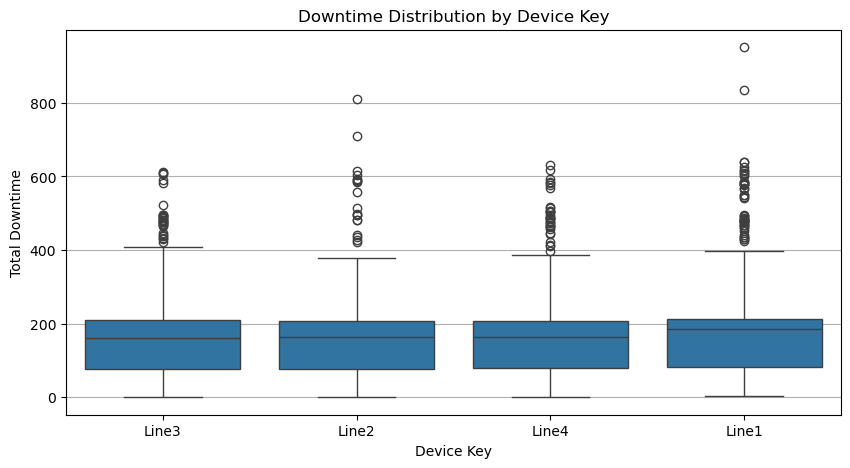

In [18]:
# using box plot for the unplanned stop time 
plt.figure(figsize=(10,5))
sns.boxplot(data=downtime_df, x='deviceKey', y='total_downtime')
plt.title('Downtime Distribution by Device Key')
plt.xlabel('Device Key')
plt.ylabel('Total Downtime')
plt.grid(axis='y')

In [14]:
# Identifying the most frequent process_state_reason_display_name associated with unplanned_stop_time
reason_counts = prod_df.groupby('process_state_reason_display_name')['unplanned_stop_time'].count()
print(reason_counts)

process_state_reason_display_name
Adjustment               291
Break                    513
Breakdown                171
Broken Conveyor          278
Die Exchange              93
Disassembly               30
Disinfection              95
Electrical Fault         414
Event Cleared              2
Gasket Change             44
Jam                      335
Lunch                    228
Main B Bus Undervolt     418
Maintenance on Robot      44
Material Change           58
Missing Reason           180
Mixing                    56
Mold Change               34
No Bottles               197
No Caps                  161
No Material              175
No Operator              156
No Shift Scheduled        90
Part Change               74
Power Failure            121
Powered Off               44
Pressure Leak             67
Random Inspection         86
Running Normally        5191
Safety Meeting            49
Security Alarm           182
Shift Handover            75
Swabs                     48
Name: unp

In [15]:
# sorting it 
reason_counts = reason_counts.sort_values(ascending=False)
print(reason_counts.head(10))

process_state_reason_display_name
Running Normally        5191
Break                    513
Main B Bus Undervolt     418
Electrical Fault         414
Jam                      335
Adjustment               291
Broken Conveyor          278
Lunch                    228
No Bottles               197
Security Alarm           182
Name: unplanned_stop_time, dtype: int64


In [17]:
# includes unplanned_stop_times where the value is 0 hence why Running Normally and Lunch are high up in the list of reasons
# filtering out rows where unplanned_stop_time is 0
downtime_df = prod_df[prod_df['unplanned_stop_time'] > 0]
reason_counts = downtime_df['process_state_reason_display_name'].value_counts()
print(reason_counts.head(10))

process_state_reason_display_name
Main B Bus Undervolt    418
Electrical Fault        414
Jam                     335
Adjustment              291
Broken Conveyor         278
No Bottles              197
Security Alarm          182
Missing Reason          180
No Material             175
Breakdown               171
Name: count, dtype: int64


<Axes: xlabel='process_state_reason_display_name'>

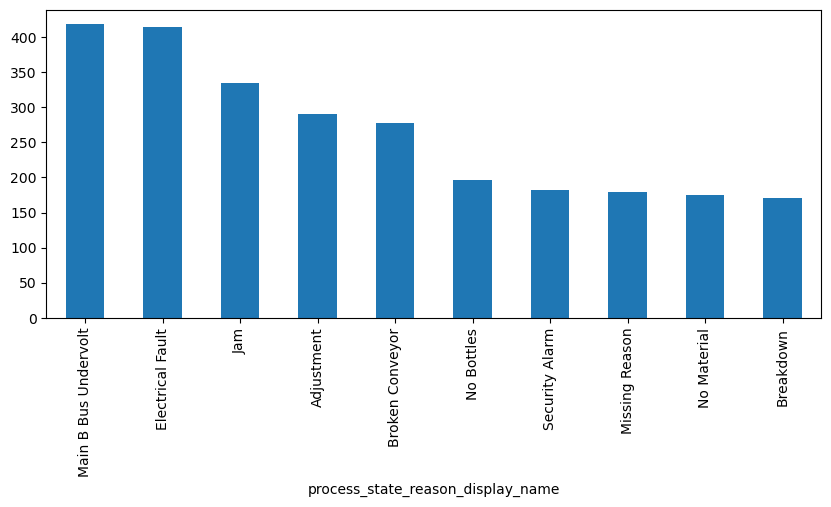

In [20]:
# visualizing the frequency distribution 
plt.figure(figsize=(10,4))
reason_counts.head(10).plot(kind='bar')

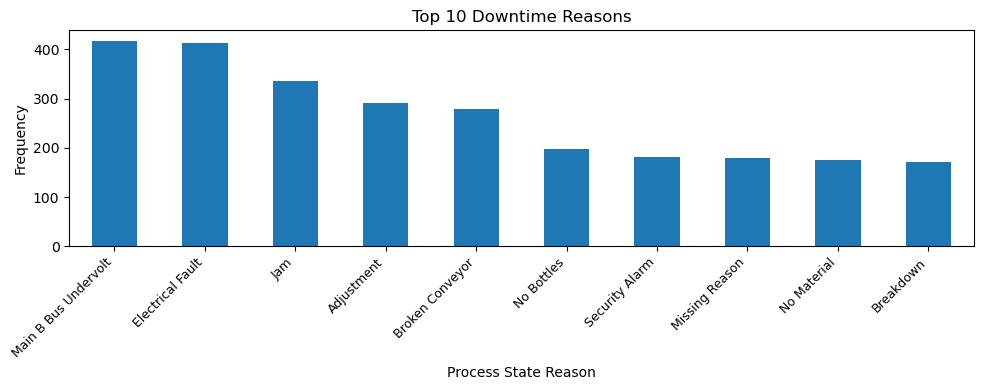

In [26]:
# customizing bar chart
plt.figure(figsize=(10,4))
reason_counts.head(10).plot(kind='bar')
plt.title('Top 10 Downtime Reasons')
plt.xlabel('Process State Reason')
plt.ylabel('Frequency')
plt.xticks(fontsize=9, rotation=45, ha='right')
plt.tight_layout()
plt.show()